In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from treatment import get_treated_data

In [33]:
X_train, X_test, y_train, y_test = get_treated_data()

In [34]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
y_pred = knn_model.predict(X_test)

In [36]:
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)

Acurácia do modelo: 0.6975308641975309


In [37]:
report = classification_report(y_test, y_pred)
print("Relatório de classificação:")
print(report)

Relatório de classificação:
              precision    recall  f1-score   support

           0       1.00      0.40      0.57      1624
           1       0.62      1.00      0.77      1616

    accuracy                           0.70      3240
   macro avg       0.81      0.70      0.67      3240
weighted avg       0.81      0.70      0.67      3240



In [38]:
confusion_matrix_ = confusion_matrix(y_test, y_pred)

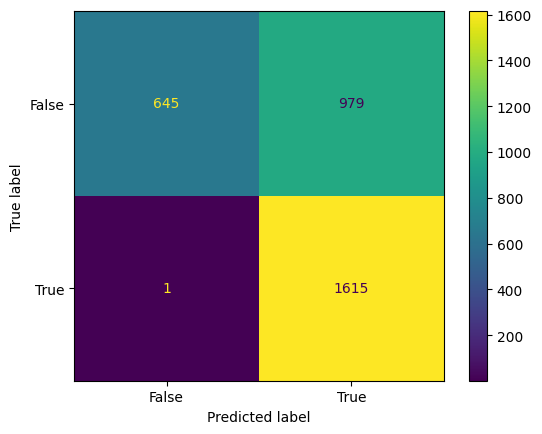

In [39]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_, display_labels = [False, True])

cm_display.plot()
plt.show()

In [40]:
#Implementação do Grid Search

In [54]:
param_grid = { 'n_neighbors' : [1, 3, 5, 7, 9],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [55]:
grid_search= GridSearchCV(knn_model, param_grid, verbose = 1, cv=3, n_jobs = -1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [56]:
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)


Melhores parâmetros encontrados:
{'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'}


In [57]:
best_knn_model = grid_search.best_estimator_


In [58]:
best_knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [59]:
grid_pred = best_knn_model.predict(X_test)

In [60]:
grid_accuracy = accuracy_score(y_test, grid_pred)
print("Acurácia do modelo:", grid_accuracy)

Acurácia do modelo: 0.8246913580246914


In [61]:
classification_rep = classification_report(y_test, grid_pred)
print("Relatório de classificação:")
print(classification_rep)

Relatório de classificação:
              precision    recall  f1-score   support

           0       1.00      0.65      0.79      1624
           1       0.74      1.00      0.85      1616

    accuracy                           0.82      3240
   macro avg       0.87      0.83      0.82      3240
weighted avg       0.87      0.82      0.82      3240



In [62]:
grid_confusion_matrix = confusion_matrix(y_test, grid_pred)

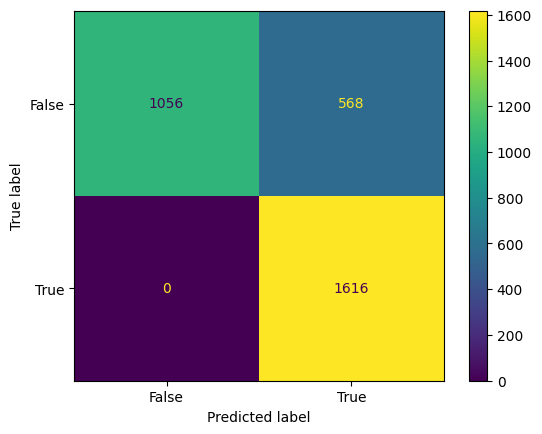

In [63]:
grid_cm_display = ConfusionMatrixDisplay(confusion_matrix = grid_confusion_matrix, display_labels = [False, True])

grid_cm_display.plot()
plt.show()

In [ ]:
# test_text = "Congratulations! You've won a free vacation. Claim your prize now!"

# processed_test_text = finalpreprocess(test_text)

# print("Texto de teste após pré-processamento:", processed_test_text)

# prediction = best_decision_tree_model.predict(processed_test_text)

# if prediction[0]:
#     print("O texto é spam!")
# else:
#     print("O texto não é spam (ham)!")